#### URL tableau https://public.tableau.com/app/profile/ilmimada.harfiya/viz/P1M2_ilmimada_harfiya/LondonRoadAccidentAnalysis2021?publish=yes

# Milestone 2

### Nama   : Ilmimada Harfiya
### Batch   : CODA-RMT-007

## Program ini dibuat untuk melakukan cleaning data, preprocessing data, analisa data dan visualisasi
---

## I. IDENTIFIKASI MASALAH

### 1. Problem Statement
#### Mengidentifikasi faktor utama (lokasi, waktu, jenis kendaraan, kondisi jalan/cuaca) yang membedakan kecelakaan lalu-lintas berat (Serious/Fatal) dengan ringan (Slight) di wilayah London pada tahun 2021 untuk menentukan intervensi keselamatan yang efektif.

### 2. Penjabaran Masalah
####    1. Jam berapa kecelakaan serius paling sering terjadi?
####    2. Bagaimana pengaruh kondisi cuaca terhadap tingkat keparahan kecelakaan?
####    3. Apakah permukaan jalan menjadi faktor keparahan kecelakaan?
####    4. Bagaimana distribusi kecelakaan per hari?
####    5. Tipe kendaraan apa saja yang paling banyak kecelakaan?
####    6. Bagaimana distribusi jumlah korban (number_of_casualties) pada kecelakaan serius?
####    7. Apakah proporsi kecelakaan serius berbeda secara signifikan antara Urban vs Rural area?

##  II. Data Loading

In [63]:
# import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu


In [38]:
df = pd.read_csv('/Volumes/Data-Disk/Hacktiv8/CODA_RMT_007/Phase_1/tugas/p1-coda007-rmt-m2-ilmimada/Road_Accident_Data.csv', parse_dates=['Accident Date']) # konversi date to date time

## III. Data Cleaning and EDA

In [39]:
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [40]:
# Rename kolom menjadi huruf kecil
df.rename(columns=str.lower, inplace=True)

In [41]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   accident_index              307973 non-null  object        
 1   accident date               307973 non-null  datetime64[ns]
 2   day_of_week                 307973 non-null  object        
 3   junction_control            307973 non-null  object        
 4   junction_detail             307973 non-null  object        
 5   accident_severity           307973 non-null  object        
 6   latitude                    307973 non-null  float64       
 7   light_conditions            307973 non-null  object        
 8   local_authority_(district)  307973 non-null  object        
 9   carriageway_hazards         5424 non-null    object        
 10  longitude                   307973 non-null  float64       
 11  number_of_casualties        307973 non-

accident_index                     0
accident date                      0
day_of_week                        0
junction_control                   0
junction_detail                    0
accident_severity                  0
latitude                           0
light_conditions                   0
local_authority_(district)         0
carriageway_hazards           302549
longitude                          0
number_of_casualties               0
number_of_vehicles                 0
police_force                       0
road_surface_conditions          317
road_type                       1534
speed_limit                        0
time                              17
urban_or_rural_area                0
weather_conditions              6057
vehicle_type                       0
dtype: int64

In [42]:
df.describe()

,accident date,latitude,longitude,number_of_casualties,number_of_vehicles,speed_limit
count,307973,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,2021-12-23 22:19:39.804722944,52.487005,-1.368884,1.356882,1.829063,38.866037
min,2021-01-01 00:00:00,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,2021-06-28 00:00:00,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,2021-12-08 00:00:00,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,2022-06-25 00:00:00,53.415517,-0.206810,1.000000,2.000000,50.000000
max,2022-12-31 00:00:00,60.598055,1.759398,48.000000,32.000000,70.000000
std,NaN,1.339011,1.356092,0.815857,0.710477,14.032933


In [43]:
# Drop kolom yang terlalu banyak missing value
df.drop(columns='carriageway_hazards', inplace=True)

# isi missing value dengan value yang sering muncul
most_freq_surface_conditions = df['road_surface_conditions'].mode()[0]
df['road_surface_conditions'].fillna(most_freq_surface_conditions, inplace=True)

most_freq_road_type = df['road_type'].mode()[0]
df['road_type'].fillna(most_freq_road_type, inplace=True)

# ganti value Fetal menjadi Fatal
df['accident_severity'].replace('Fetal', 'Fatal', inplace=True)

# drop kolom yang tidak dipakai
df.drop(columns=['junction_control','local_authority_(district)','police_force'], inplace=True)

/var/folders/5y/d2m2nrkx3jv10nbjs86mhh240000gn/T/ipykernel_2969/3640073849.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['road_surface_conditions'].fillna(most_freq_surface_conditions, inplace=True)
/var/folders/5y/d2m2nrkx3jv10nbjs86mhh240000gn/T/ipykernel_2969/3640073849.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

In [44]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   accident_index           307973 non-null  object        
 1   accident date            307973 non-null  datetime64[ns]
 2   day_of_week              307973 non-null  object        
 3   junction_detail          307973 non-null  object        
 4   accident_severity        307973 non-null  object        
 5   latitude                 307973 non-null  float64       
 6   light_conditions         307973 non-null  object        
 7   longitude                307973 non-null  float64       
 8   number_of_casualties     307973 non-null  int64         
 9   number_of_vehicles       307973 non-null  int64         
 10  road_surface_conditions  307973 non-null  object        
 11  road_type                307973 non-null  object        
 12  speed_limit     

accident_index                0
accident date                 0
day_of_week                   0
junction_detail               0
accident_severity             0
latitude                      0
light_conditions              0
longitude                     0
number_of_casualties          0
number_of_vehicles            0
road_surface_conditions       0
road_type                     0
speed_limit                   0
time                         17
urban_or_rural_area           0
weather_conditions         6057
vehicle_type                  0
dtype: int64

In [46]:
# Mapping Road Surface Conditions disesuaikan dengan Weather Conditions untuk mengisi missing values di kolom Weather Condition
conditions_mapping = {
    'Dry': 'Fine no high winds',
    'Wet or damp': 'Raining no high winds',
    'Snow': 'Snowing no high winds',
    'Frost or ice': 'Snowing + high winds'
}

df['weather_conditions'].fillna(df['road_surface_conditions'].map(conditions_mapping), inplace=True)
df['weather_conditions'].fillna('Other', inplace=True)

/var/folders/5y/d2m2nrkx3jv10nbjs86mhh240000gn/T/ipykernel_2969/2717321507.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weather_conditions'].fillna(df['road_surface_conditions'].map(conditions_mapping), inplace=True)


In [47]:
# memperbaiki format waktu
df['time']= df['time'].str.split(':').str[0]

# Convert kolom 'time' menjadi float
df['time'] = df['time'].astype(float)

# Mean data kolom time
mean_time = df['time'].mean().round(0)

# Fisi missing value kolom time dengan mean time
df['time'].fillna(mean_time, inplace=True)

df['time'].isnull().sum()

/var/folders/5y/d2m2nrkx3jv10nbjs86mhh240000gn/T/ipykernel_2969/1224385646.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['time'].fillna(mean_time, inplace=True)


0

In [48]:
# mengelompokkan vehicle type
category_mapping = {
    'Car': 'Car',
    'Taxi/Private hire car': 'Taxi',
    'Motorcycle over 500cc': 'Motorcycle',
    'Van / Goods 3.5 tonnes mgw or under': 'Van',
    'Goods over 3.5t. and under 7.5t': 'Other',
    'Motorcycle 125cc and under': 'Motorcycle',
    'Motorcycle 50cc and under': 'Motorcycle',
    'Bus or coach (17 or more pass seats)': 'Bus',
    'Goods 7.5 tonnes mgw and over': 'Other',
    'Other vehicle': 'Other',
    'Motorcycle over 125cc and up to 500cc': 'Motorcycle',
    'Agricultural vehicle': 'Other',
    'Minibus (8 - 16 passenger seats)': 'Other',
    'Pedal cycle': 'Pedal cycle',
    'Ridden horse': 'Ridden horse'
}

# Mengelompokkan tipe kendaraan di kolom 'vehicle_type' 
df['vehicle_type'] = df['vehicle_type'].map(category_mapping)

df['vehicle_type'].unique()

array(['Car', 'Taxi', 'Motorcycle', 'Van', 'Other', 'Bus', 'Pedal cycle',
       'Ridden horse'], dtype=object)

In [92]:
df.to_csv('Road_Accident_Data_Clean180725.csv', index=False)

In [93]:
df = pd.read_csv('/Volumes/Data-Disk/Hacktiv8/CODA_RMT_007/Phase_1/tugas/p1-coda007-rmt-m2-ilmimada/Road_Accident_Data_Clean180725.csv')
df.head()

,accident_index,accident date,day_of_week,junction_detail,accident_severity,latitude,light_conditions,longitude,number_of_casualties,number_of_vehicles,road_surface_conditions,road_type,speed_limit,time,urban_or_rural_area,weather_conditions,vehicle_type,severity_binary,month,is_serious
0,200901BS70001,2021-01-01,Thursday,T or staggered junction,Serious,51.512273,Daylight,-0.201349,1,2,Dry,One way street,30,15.0,Urban,Fine no high winds,Car,Heavy,1,True
1,200901BS70002,2021-01-05,Monday,Crossroads,Serious,51.514399,Daylight,-0.199248,11,2,Wet or damp,Single carriageway,30,10.0,Urban,Fine no high winds,Taxi,Heavy,1,True
2,200901BS70003,2021-01-04,Sunday,T or staggered junction,Slight,51.486668,Daylight,-0.179599,1,2,Dry,Single carriageway,30,14.0,Urban,Fine no high winds,Taxi,Slight,1,False
3,200901BS70004,2021-01-05,Monday,T or staggered junction,Serious,51.507804,Daylight,-0.203110,1,2,Frost or ice,Single carriageway,30,8.0,Urban,Other,Motorcycle,Heavy,1,True
4,200901BS70005,2021-01-06,Tuesday,Crossroads,Serious,51.482076,Darkness - lights lit,-0.173445,1,2,Dry,Single carriageway,30,17.0,Urban,Fine no high winds,Car,Heavy,1,True


In [54]:
# membuat kelompok tingkat keparahan kecelakaan
df['severity_binary'] = np.where(df['accident_severity'].isin(['Serious','Fatal']), 'Heavy', 'Slight')
df.head()

,accident_index,accident date,day_of_week,junction_detail,accident_severity,latitude,light_conditions,longitude,number_of_casualties,number_of_vehicles,road_surface_conditions,road_type,speed_limit,time,urban_or_rural_area,weather_conditions,vehicle_type,severity_binary
0,200901BS70001,2021-01-01,Thursday,T or staggered junction,Serious,51.512273,Daylight,-0.201349,1,2,Dry,One way street,30,15.0,Urban,Fine no high winds,Car,Heavy
1,200901BS70002,2021-01-05,Monday,Crossroads,Serious,51.514399,Daylight,-0.199248,11,2,Wet or damp,Single carriageway,30,10.0,Urban,Fine no high winds,Taxi,Heavy
2,200901BS70003,2021-01-04,Sunday,T or staggered junction,Slight,51.486668,Daylight,-0.179599,1,2,Dry,Single carriageway,30,14.0,Urban,Fine no high winds,Taxi,Slight
3,200901BS70004,2021-01-05,Monday,T or staggered junction,Serious,51.507804,Daylight,-0.203110,1,2,Frost or ice,Single carriageway,30,8.0,Urban,Other,Motorcycle,Heavy
4,200901BS70005,2021-01-06,Tuesday,Crossroads,Serious,51.482076,Darkness - lights lit,-0.173445,1,2,Dry,Single carriageway,30,17.0,Urban,Fine no high winds,Car,Heavy


In [57]:
# Convert to datetime
df['accident date'] = pd.to_datetime(df['accident date'], errors='coerce')
df['accident date'].dtype  # should show datetime64[ns]

dtype('<M8[ns]')

## IV. Analisis dan Perhitungan

### Visualisasi Data

#### 1. Pada jam berapa sering terjadi kecelakaan fatal?

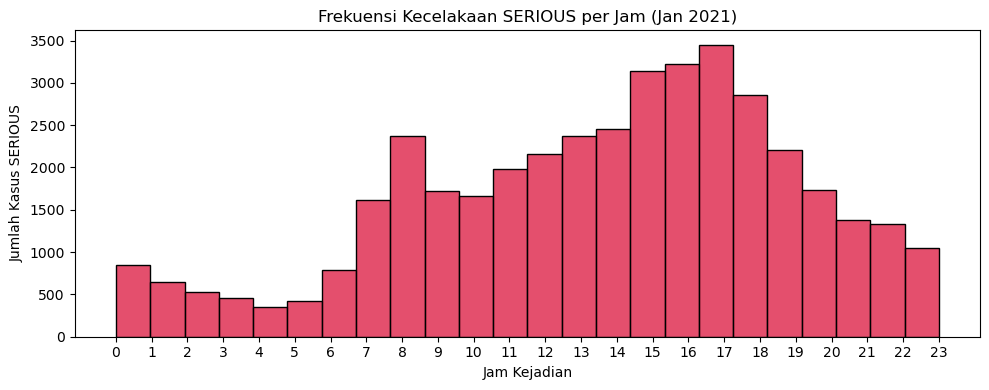

In [ ]:
df['is_serious'] = df['accident_severity'] == 'Serious'

plt.figure(figsize=(10,4))
sns.histplot(data=df[df['is_serious']], x='time', bins=24, color='crimson', kde=False)
plt.title('Frekuensi Kecelakaan SERIOUS per Jam (Jan 2021)')
plt.xlabel('Jam Kejadian')
plt.ylabel('Jumlah Kasus SERIOUS')
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

Paling sering terjadi kecelakaan fatal pada jam 8 dan 17, ditunjukkan dengan adanya puncak grafik. hal ini menunjukkan bahwa terjadinya kecelakaan pada saat jam sibuk pergi dan pulang kantor.

#### 2. Bagaimana pengaruh cuaca terhadap keparahan kecelakaan?

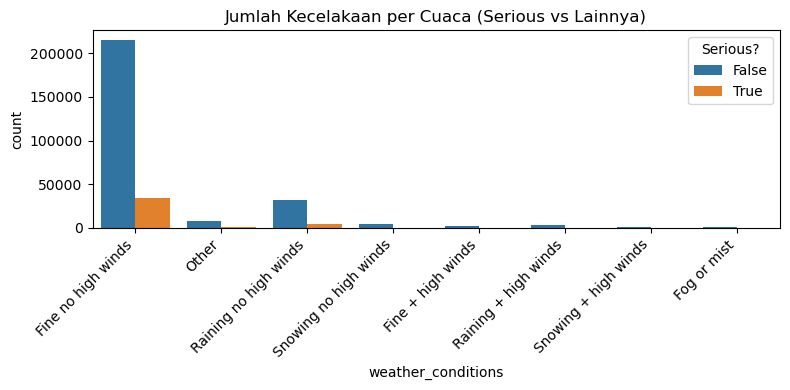

In [82]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='weather_conditions', hue='is_serious')
plt.title('Jumlah Kecelakaan per Cuaca (Serious vs Lainnya)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Serious?')
plt.tight_layout()
plt.show()

Cuaca no high winds mendominasi kasus serius, menandakan faktor non-cuaca lebih dominan.

#### 3. Apakah permukaan jalan menjadi faktor keparahan kecelakaan?

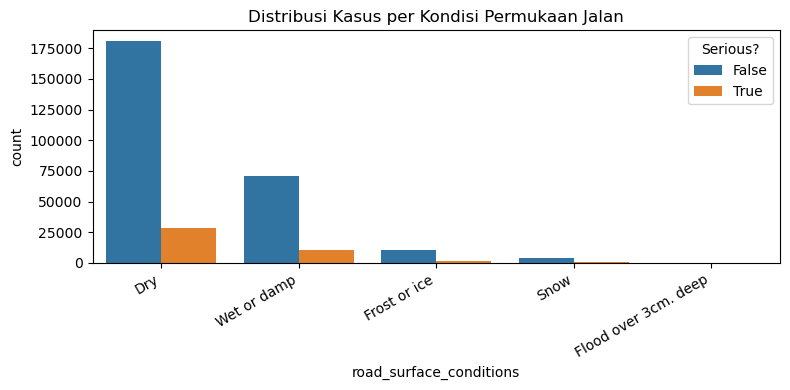

In [83]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='road_surface_conditions', hue='is_serious')
plt.title('Distribusi Kasus per Kondisi Permukaan Jalan')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Serious?')
plt.tight_layout()
plt.show()

Permukaan kering memiliki proporsi lebih tinggi daripada permukaan basa atau wet, ini menunjukkan bahwa faktor kecelakaan tidak terlalu dipengaruhi kondisi jalan yang tidak kering.

#### 4. Bagaimana distribusi kecelakaan per hari?

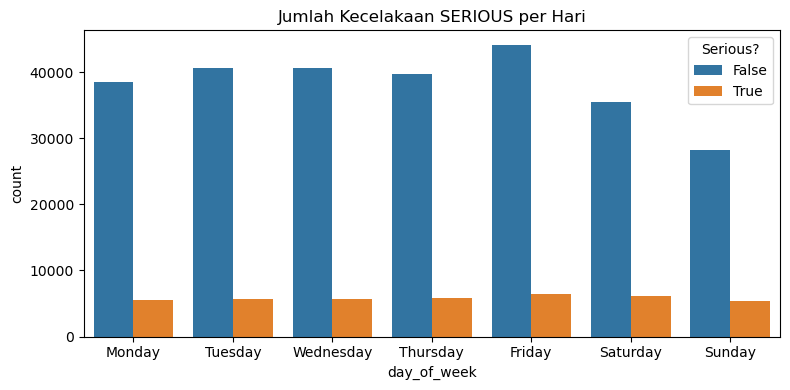

In [77]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='day_of_week', hue='is_serious',
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Jumlah Kecelakaan SERIOUS per Hari')
plt.legend(title='Serious?')
plt.tight_layout()
plt.show()

Pada hari Jumat kasus kecelakaan memuncak, kemungkinan karena volume kendaraan yang meningkat saat menjelang weekend.

#### 5. Tipe kendaraan apa saja yang paling banyak kecelakaan?

Text(0.5, 1.0, 'Vehicle Type vs Severity')

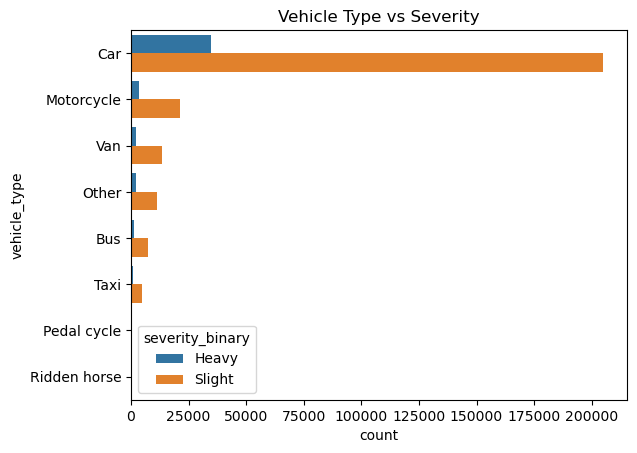

In [87]:
sns.countplot(y='vehicle_type', hue='severity_binary', data=df, order=df['vehicle_type'].value_counts().index)
plt.title('Vehicle Type vs Severity')

Tipe kendaraan Mobil menunjukkan grafik yang signifikan, kemungkinan karena di London sangat jarang ada sepeda motor.

### Statistik Deskriptif
#### 6. Distribusi jumlah korban pada kasus serius

count    40740.000000
mean         1.455866
std          1.008319
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         42.000000
Name: number_of_casualties, dtype: float64


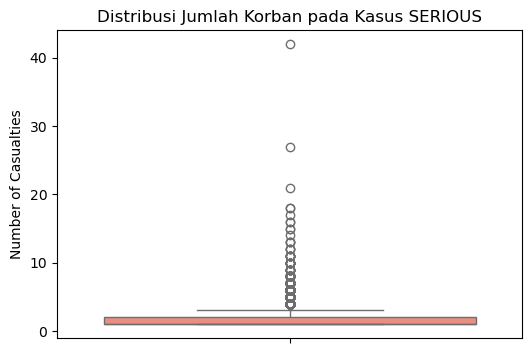

In [78]:
serious = df[df['is_serious']]['number_of_casualties']
desc = serious.describe()
print(desc)

plt.figure(figsize=(6,4))
sns.boxplot(y=serious, color='salmon')
plt.title('Distribusi Jumlah Korban pada Kasus SERIOUS')
plt.ylabel('Number of Casualties')
plt.show()

Mayoritas kecelakaan serius menimbulkan korban 1 orang, namun keberadaan outlier 42 orang korban menjadi pertanda untuk intervensi spesifik di titik rawan kecelakaan

### Statistik Inferensial

#### 7. Resiko kecelakaan di area Urban vs Rural (χ² test)

Tabel kontingensi:
is_serious            False  True 
urban_or_rural_area               
Rural                 92213  17228
Urban                175020  23512

χ² = 933.98,  p-value = 0.0000


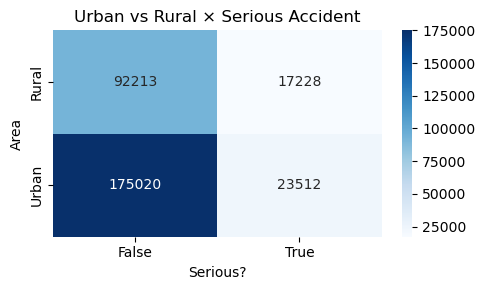

In [84]:
ct = pd.crosstab(df['urban_or_rural_area'], df['is_serious'])
chi2, p, dof, expected = chi2_contingency(ct)

print("Tabel kontingensi:")
print(ct)
print(f"\nχ² = {chi2:.2f},  p-value = {p:.4f}")

# Visual ringkas
plt.figure(figsize=(5,3))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('Urban vs Rural × Serious Accident')
plt.ylabel('Area')
plt.xlabel('Serious?')
plt.tight_layout()
plt.show()

H₀ : proporsi kecelakaan serius sama antara area Urban dan Rural

H₁ : proporsi kecelakaan serius berbeda antara keduanya

χ² = 933.98

p-value ≈ 0.0000  → p < 0.001

Sehingga Tolak H₀ : ada perbedaan proporsi yang sangat signifikan.

Area Rural lebih beresiko terhadap kecelakaan serius dibandingkan dengan Urban.

## V. Kesimpulan

#### Berdasarkan analisis terhadap dataset kecelakaan lalu lintas selama bulan Januari 2021, diperoleh beberapa temuan penting:

1. Waktu Rawan Kecelakaan:

- Kecelakaan paling sering terjadi pada jam 17:00 – 18:00, yaitu menjelang waktu pulang kerja.

- Sebagian besar terjadi pada hari kerja, terutama hari Jumat.

2. Kondisi Lingkungan:

- Mayoritas kecelakaan terjadi saat cuaca cerah (Fine no high winds) dan pada siang hari (Daylight), yang menunjukkan bahwa faktor non-cuaca juga signifikan.

- Permukaan jalan kering (Dry) adalah kondisi paling umum saat kecelakaan terjadi.

3. Tipe Lokasi dan Jalan:

- T atau staggered junctions merupakan lokasi persimpangan paling sering terjadi kecelakaan.

- Jalan satu arah (One way street) dan jalan dua arah tanpa median banyak terlibat kecelakaan.

4. Jumlah Korban & Kendaraan:

- Sebagian besar kecelakaan hanya melibatkan 1–2 kendaraan dan 1 korban.

- Namun, insiden dengan lebih dari 3 kendaraan menunjukkan potensi korban yang lebih banyak.

5. Tipe Kendaraan:

- Mobil pribadi (Car) adalah kendaraan yang paling sering terlibat, diikuti oleh motor.

#### Rekomendasi
- Peningkatan pengawasan lalu lintas pada jam sibuk (7-9 dan 16-18) dengan patroli atau menambah CCTV.

- Perbaikan infrastruktur dan rambu di area persimpangan T/staggered, karena merupakan titik rawan.

- Edukasi pengguna jalan bahwa kecelakaan bisa terjadi bahkan saat kondisi jalan dan cuaca baik.

- Kampanye keselamatan berkendara untuk pengguna mobil dan motor, mengingat keterlibatannya paling tinggi.


